# Moraga, P. Modeling and Visualization of Geospatial Data

## Capitulo 4: Inferencia Bayesiana e INLA

In [2]:
library(INLA)

Loading required package: foreach

Loading required package: parallel

Loading required package: sp

This is INLA_21.02.23 built 2021-02-22 21:11:05 UTC.
 - See www.r-inla.org/contact-us for how to get help.
 - Save 379.7Mb of storage running 'inla.prune()'



### Predictor lineal
Se especifica como fórmula igual que en `lm()`, pero ahora agregamos los efectos aleatorios, que se pasan con la función `f()`.

El primer argumento de `f()` especifica el elemento del efecto aleatorio que aplica a cada observación; el segundo argumento es el nombre del modelo, como "iid" o "ar1". 

In [10]:
?f

Ejemplo:

In [11]:
y ~ x1 + x2 + f(i, model = "iid")

y ~ x1 + x2 + f(i, model = "iid")

### Función INLA

Es la que ajusta el modelo. Se le pasa la fórmula, los datos y la familia de la verosmilitud. Posibles familias:

In [12]:
names(inla.models()$likelihood)
inla.doc("poisson")

[1] "poisson"                       "xpoisson"                     
 [3] "cenpoisson"                    "gpoisson"                     
 [5] "poisson.special1"              "binomial"                     
 [7] "xbinomial"                     "pom"                          
 [9] "bgev"                          "gamma"                        
[11] "gammasurv"                     "gammajw"                      
[13] "gammajwsurv"                   "gammacount"                   
[15] "qkumar"                        "qloglogistic"                 
[17] "qloglogisticsurv"              "beta"                         
[19] "betabinomial"                  "betabinomialna"               
[21] "cbinomial"                     "nbinomial"                    
[23] "nbinomial2"                    "simplex"                      
[25] "gaussian"                      "circularnormal"               
[27] "wrappedcauchy"                 "iidgamma"                     
[29] "iidlogitbeta"                  "loggammafrailty"              
[31] "logistic"                      "sn"                           
[33] "gev"                           "lognormal"                    
[35] "lognormalsurv"                 "exponential"                  
[37] "exponentialsurv"               "coxph"                        
[39] "weibull"                       "weibullsurv"                  
[41] "loglogistic"                   "loglogisticsurv"              
[43] "weibullcure"                   "stochvol"                     
[45] "stochvolt"                     "stochvolnig"                  
[47] "zeroinflatedpoisson0"          "zeroinflatedpoisson1"         
[49] "zeroinflatedpoisson2"          "zeroinflatedcenpoisson0"      
[51] "zeroinflatedcenpoisson1"       "zeroinflatedbetabinomial0"    
[53] "zeroinflatedbetabinomial1"     "zeroinflatedbinomial0"        
[55] "zeroinflatedbinomial1"         "zeroinflatedbinomial2"        
[57] "zeroninflatedbinomial2"        "zeroninflatedbinomial3"       
[59] "zeroinflatedbetabinomial2"     "zeroinflatednbinomial0"       
[61] "zeroinflatednbinomial1"        "zeroinflatednbinomial1strata2"
[63] "zeroinflatednbinomial1strata3" "zeroinflatednbinomial2"       
[65] "t"                             "tstrata"                      
[67] "nmix"                          "nmixnb"                       
[69] "gp"                            "dgp"                          
[71] "logperiodogram"                "tweedie"                      
[73] "fmri"                          "fmrisurv"

Además, hay dos parámetros adicionales: `contro.compute` y `control.predictor`.

`control.compute` le dice si quiero calcular o no cosas como el `DIC`.

`control.predictor` le especifica la función de enlace y si queremos calcular las densidades marginales para el predictor lineal.

### Priors

Las priors disponibles son:

In [13]:
names(inla.models()$prior)
inla.doc("gaussian")

[1] "normal"                 "gaussian"               "linksnintercept"       
 [4] "wishart1d"              "wishart2d"              "wishart3d"             
 [7] "wishart4d"              "wishart5d"              "loggamma"              
[10] "gamma"                  "minuslogsqrtruncnormal" "logtnormal"            
[13] "logtgaussian"           "flat"                   "logflat"               
[16] "logiflat"               "mvnorm"                 "pc.alphaw"             
[19] "pc.ar"                  "dirichlet"              "none"                  
[22] "invalid"                "betacorrelation"        "logitbeta"             
[25] "pc.prec"                "pc.dof"                 "pc.cor0"               
[28] "pc.cor1"                "pc.fgnh"                "pc.spde.GA"            
[31] "pc.matern"              "pc.range"               "pc.sn"                 
[34] "pc.gamma"               "pc.mgamma"              "pc.gammacount"         
[37] "pc.gevtail"             "pc"                     "ref.ar"                
[40] "pom"                    "jeffreystdf"            "expression:"           
[43] "table:"

**Prior de los efectos fijos:**

In [8]:
inla.set.control.fixed.default()[c("mean.intercept","prec.intercept", "mean", "prec")]

$mean.intercept
[1] 0

$prec.intercept
[1] 0

$mean
[1] 0

$prec
[1] 0.001

Por default, al intercept se le asigna una prior Gaussiana con media y precisión igual a 0, similarmente al resto de los efectos fijos. Podemos cambiarlo con el parámetro `control.fixed` de `inla()`.

In [14]:
# prior.fixed <- list(mean.intercept = <>, prec.intercept = <>, mean = <>, prec = <>)

#res <- inla(formula,
#data = d,
#control.fixed = prior.fixed
#)

#### Prior de los hiperparámetros
La prior de los hiperparámetros se asigna con el argumento hyper en `f()`:

In [16]:
#formula <- y ~ 1 + f(<>, model = <>, hyper = prior.f)

#### Priors de los parámetros de la verosimilitud

Las priors de los parámetros de la verosimilitud se asignan con el parámetro `control.family` de `inla()`.

In [ ]:
#res <- inla(formula,
#data = d,
#control.fixed = prior.fixed,
#control.family = list(..., hyper = prior.l)
#)

### Ejemplo

Datos de tasa de mortalidad después de cirugía en 12 hospitales. El objetivo es evaluar la performance de cada hospital.

In [32]:
Surg

n,r,hospital
<int>,<int>,<fct>
47,0,A
148,18,B
119,8,C
810,46,D
211,8,E
196,13,F
148,9,G
215,31,H
207,14,I


Asumimos que la cantidad de muertes en cada hospital se distribuye binomial:

$$Y_i \sim Binomial(n_i, p_i), i=1, ..., 12$$

Asumimos que la tasa de mortalidad a traves de los hospitales es similar y por eso elegimos un modelo de efector aleatorios para la verdadera tasa de mortalidad $p_i$:

$$logit(p_i)=\alpha+u_i, u_i \sim N(0, \sigma^2)$$

$\alpha$ es la tasa de mortalidad *logit* de la poblacion. Para ella especificamos una prior no informativa:
$$\alpha \sim N(0, 1/\tau), \tau=0$$

La prior default para la precision de los $u_i$ es $1/\sigma^2 \sim \Gamma$. Podemos cambiarla por una PC prior (penalized complexity) sobre la desviacion estandar:

$$P(\sigma \gt 1)=0.01$$

In [22]:
prior.prec = list(prec = list(prior = 'pc.prec',
                             param = c(1, 0.01)))

In [23]:
formula = r ~ f(hospital, model='iid', hyper=prior.prec)

Ahora llamamos a `inla()` y ademas elegimos calcular las posteriores marginales de los parametros y el DIC.

In [24]:
res = inla(formula, data=Surg, family='binomial', Ntrials=n, 
           control.predictor=list(compute=TRUE),
           control.compute=list(dic=TRUE)
          )

In [25]:
summary(res)


Call:
   c("inla(formula = formula, family = \"binomial\", data = Surg, Ntrials 
   = n, ", " control.compute = list(dic = TRUE), control.predictor = 
   list(compute = TRUE))" ) 
Time used:
    Pre = 1.64, Running = 0.459, Post = 0.482, Total = 2.58 
Fixed effects:
              mean   sd 0.025quant 0.5quant 0.975quant  mode kld
(Intercept) -2.545 0.14     -2.838   -2.539     -2.281 -2.53   0

Random effects:
  Name	  Model
    hospital IID model

Model hyperparameters:
                        mean    sd 0.025quant 0.5quant 0.975quant mode
Precision for hospital 12.04 18.30       2.37     8.29      41.86 5.34

Expected number of effective parameters(stdev): 7.26(1.70)
Number of equivalent replicates : 1.65 

Deviance Information Criterion (DIC) ...............: 74.93
Deviance Information Criterion (DIC, saturated) ....: 25.16
Effective number of parameters .....................: 8.17

Marginal log-Likelihood:  -41.16 
Posterior marginals for the linear predictor and
 the fitted value

In [27]:
plot(res, plot.prior=TRUE)

In [28]:
res$dic

$dic
[1] 74.92845

$p.eff
[1] 8.173432

$mean.deviance
[1] 66.75501

$deviance.mean
[1] 58.58158

$dic.sat
[1] 25.16513

$mean.deviance.sat
[1] 16.9917

$deviance.mean.sat
[1] 8.818268

$family.dic
[1] 74.92845

$family.dic.sat
[1] 25.16513

$family.p.eff
[1] 8.173432

$family
 [1] 1 1 1 1 1 1 1 1 1 1 1 1

$local.dic
 [1] 5.849212 6.785777 4.903269 7.553179 6.389352 5.610174 5.195206 8.392004
 [9] 5.695820 4.842754 7.255585 6.456113

$local.dic.sat
 [1] 5.8492113 2.1777913 1.0346200 1.9414920 2.4898324 1.2630979 1.2042589
 [8] 3.2703349 1.2769532 0.9905333 2.1648092 1.5021980

$local.p.eff
 [1] 0.3389156 0.7382275 0.5082077 0.9120100 0.7423733 0.6187107 0.5591182
 [8] 1.0552698 0.6300943 0.4776621 0.8526248 0.7402180

Resumen de los efectos:

In [29]:
res$summary.fixed

,mean,sd,0.025quant,0.5quant,0.975quant,mode,kld
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-2.544545,0.1395948,-2.83821,-2.539273,-2.281274,-2.530099,1.159096e-05


In [30]:
res$summary.random

ID,mean,sd,0.025quant,0.5quant,0.975quant,mode,kld
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A,-0.33064315,0.3626286,-1.16725405,-0.28596536,0.2653593,-0.19409291,1.127855e-04
B,0.34703955,0.2514953,-0.10974523,0.33462925,0.8719642,0.30622005,9.295283e-05
C,-0.04081594,0.2594403,-0.57488674,-0.03559614,0.4648903,-0.02612738,3.900425e-06
D,-0.21694578,0.1803482,-0.58146365,-0.21373087,0.1335879,-0.20484303,4.978647e-05
E,-0.35152519,0.2639365,-0.92452808,-0.33124468,0.1098747,-0.28754479,8.491599e-05
F,-0.05876082,0.2339906,-0.53736126,-0.05420156,0.3968649,-0.04448731,5.739743e-06
G,-0.09775808,0.2517515,-0.62335780,-0.08890685,0.3832136,-0.07005152,7.251715e-06
H,0.54578924,0.2401208,0.10285613,0.53793760,1.0395851,0.52513719,4.883734e-04
I,-0.04785960,0.2305908,-0.51706122,-0.04424105,0.4030738,-0.03663323,5.098520e-06


In [31]:
res$summary.hyperpar

,mean,sd,0.025quant,0.5quant,0.975quant,mode
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Precision for hospital,12.04329,18.3028,2.366033,8.292227,41.8567,5.33665


In [33]:
res$summary.linear.predictor

,mean,sd,0.025quant,0.5quant,0.975quant,mode,kld
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Predictor.01,-2.872526,0.3836557,-3.756071,-2.825710,-2.244944,-2.732344,1.169873e-04
Predictor.02,-2.193612,0.2305504,-2.636070,-2.196419,-1.737136,-2.203832,8.129273e-05
Predictor.03,-2.581049,0.2570539,-3.119923,-2.570983,-2.098677,-2.552766,6.672199e-06
Predictor.04,-2.758290,0.1404766,-3.045706,-2.754063,-2.495016,-2.745594,1.140976e-04
Predictor.05,-2.891312,0.2639025,-3.461995,-2.871794,-2.430476,-2.831419,9.973056e-05
Predictor.06,-2.598849,0.2226021,-3.063231,-2.590126,-2.183043,-2.573265,9.386909e-06
Predictor.07,-2.637836,0.2477923,-3.162331,-2.625473,-2.181038,-2.601046,9.174595e-06
Predictor.08,-1.995441,0.2075965,-2.408034,-1.992030,-1.598281,-1.982393,6.285189e-04
Predictor.09,-2.587982,0.2175480,-3.040437,-2.579992,-2.180333,-2.564698,9.171333e-06


In [35]:
res$marginals.linear.predictor

x,y
-6.750060,2.649680e-14
-5.974442,1.739779e-06
-5.898493,6.623454e-06
-5.798836,1.195852e-05
-5.495141,5.767165e-05
-5.198824,2.446902e-04
-5.052720,4.857673e-04
-4.811015,1.427706e-03
-4.706847,2.230935e-03
-4.549315,4.314423e-03


In [34]:
res$summary.fitted.values

,mean,sd,0.025quant,0.5quant,0.975quant,mode
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
fitted.Predictor.01,0.05667271,0.018717861,0.02284147,0.05595057,0.09578646,0.05534572
fitted.Predictor.02,0.10224477,0.021318371,0.06685279,0.10007249,0.14967711,0.09535079
fitted.Predictor.03,0.07220456,0.016945501,0.04229289,0.07102944,0.10922548,0.06919909
fitted.Predictor.04,0.06010510,0.007870338,0.04540323,0.05985760,0.07620829,0.05936136
fitted.Predictor.05,0.05410251,0.012983949,0.03041314,0.05356562,0.08087811,0.05244412
fitted.Predictor.06,0.07057460,0.014382806,0.04464968,0.06977659,0.10128364,0.06844378
fitted.Predictor.07,0.06837736,0.015448148,0.04060814,0.06751689,0.10146629,0.06620367
fitted.Predictor.08,0.12140074,0.022045061,0.08256214,0.12004229,0.16822196,0.11739594
fitted.Predictor.09,0.07122799,0.014195350,0.04563216,0.07043727,0.10153055,0.06909137


In [38]:
#res$marginals.fitted.values

In [42]:
#res$marginals.fixed

Distribucion posterior del parametro $\alpha$:

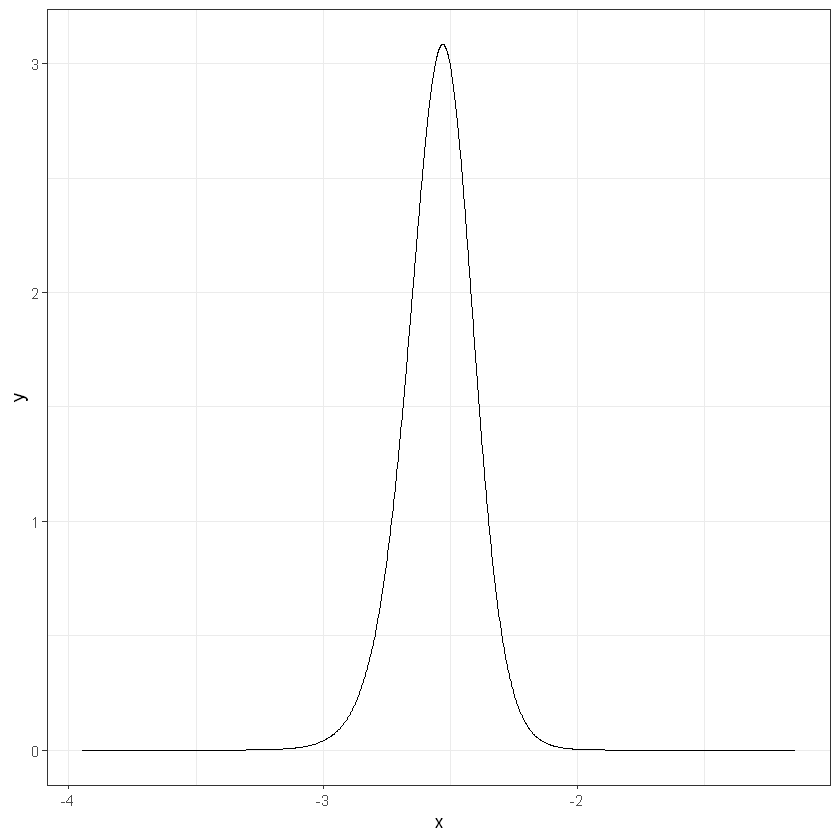

In [44]:
library(ggplot2)
alpha <- res$marginals.fixed[[1]]
ggplot(data.frame(inla.smarginal(alpha)), aes(x, y)) +
geom_line() +
theme_bw()